## Universidad Politécnica Salesiana
## Carrera de Computación

## Visión por Computador

### Practica 0: Cálculo de entropía

### Autor: Diego Tapia

### Fecha: 15 de abril del 2024

**Entropía**

La entropía en imágenes, ya sea en escala de grises o a color, es una medida de la incertidumbre o el desorden en la distribución de los niveles de intensidad de los píxeles en la imagen.

En una imagen en escala de grises, la entropía mide qué tan uniformemente distribuidos están los tonos de gris en toda la imagen. Una imagen con baja entropía tendría una distribución de tonos de gris más uniforme, lo que significa que la mayoría de los píxeles tendrían valores de intensidad similares. Por otro lado, una imagen con alta entropía tendría una distribución menos uniforme, con una mayor variación en los niveles de gris entre los píxeles.

En imágenes a color, la entropía se refiere a la distribución de los componentes de color (rojo, verde y azul en el modelo RGB, por ejemplo). Una imagen con baja entropía tendría una distribución de colores más uniforme, con una prevalencia de ciertos colores o combinaciones de colores. Una imagen con alta entropía tendría una distribución más variada y menos predecible de colores en toda la imagen.

En resumen, la entropía en imágenes nos ayuda a comprender qué tan variada o uniformemente distribuidos están los tonos de gris o los colores en la imagen, lo que puede ser útil en varias aplicaciones, como compresión de imágenes, análisis de texturas o detección de bordes.



In [2]:
import os, time, psutil
from skimage import io, color
import skimage.measure as ski
import matplotlib.pyplot as plt


In [3]:

carpeta_imagenes = './images'

# Iniciar tiempos

# tiempo total del script
tiempo_inicio = time.time()

# Iniciar listas para guardar los tiempos de cálculo de la entropía
tiempos_color = []
tiempos_gris = []

# Iniciar uso de RAM

memoria_inicio = psutil.virtual_memory().used


# listas para guardar la entropia a color y escala de grises
lista_entropias_color = []
lista_entropias_gris = []

# Obtener la lista de archivos en la carpeta
lista_imagenes = os.listdir(carpeta_imagenes)

# Iterar sobre cada imagen
for nombre_imagen in lista_imagenes:
    # Construir la ruta completa de la imagen
    ruta_imagen = os.path.join(carpeta_imagenes, nombre_imagen)
    
    # Cargar la imagen
    imagen = io.imread(ruta_imagen)

    # Verificar si la imagen tiene 4 canales y convertirla a 3 canales si es necesario
    if len(imagen.shape) == 3 and imagen.shape[2] == 4:
        imagen = imagen[:, :, :3]
    
     # Calcular el tiempo de cálculo de la entropía en escala de grises
    inicio_entropia_gris = time.time()
    imagen_gris = color.rgb2gray(imagen)
    entropia_gris = ski.shannon_entropy(imagen_gris)
    fin_entropia_gris = time.time()
    tiempos_gris.append(fin_entropia_gris - inicio_entropia_gris)
    # se agrega la entropia gris a la lista
    lista_entropias_gris.append(entropia_gris)
    
    # Calcular la entropía de Shannon de la imagen
    # Calcular el tiempo de cálculo de la entropía a color
    inicio_entropia_color = time.time()
    entropia_color = ski.shannon_entropy(imagen)
    fin_entropia_color = time.time()
    tiempos_color.append(fin_entropia_color - inicio_entropia_color)
    # se agrega la entropia color a la lista
    lista_entropias_color.append(entropia_color)

    # Imprimir la entropía de la imagen
    print(f"Entropía gris de {nombre_imagen}: {entropia_gris}")
    print(f"Entropía color de {nombre_imagen}: {entropia_color}")


# Calcular el tiempo de ejecución
tiempo_final = time.time()
tiempo_total = tiempo_final - tiempo_inicio

# Calcular el uso de CPU y RAM
cpu_final = psutil.cpu_percent()
memoria_final = psutil.virtual_memory().used 
memoria_usada_mb = (memoria_final - memoria_inicio) / (1024**2)
# Imprimir resultados
print("Tiempo total de ejecución:", tiempo_total, "segundos")
print("Uso de CPU:", cpu_final, "%")
print("Uso de RAM:", memoria_usada_mb, "Megabytes")






Entropía gris de 1.jpg: 11.3122831126917
Entropía color de 1.jpg: 6.755118491669408
Entropía gris de 10.jpg: 12.067161039269212
Entropía color de 10.jpg: 6.964056668025459
Entropía gris de 100.jpg: 13.653600969335402
Entropía color de 100.jpg: 7.354397026911498
Entropía gris de 1000.jpg: 15.149275053598451
Entropía color de 1000.jpg: 7.353923972662908
Entropía gris de 1001.jpg: 10.504973910677181
Entropía color de 1001.jpg: 6.709589008278432
Entropía gris de 1002.jpg: 11.868638881379864
Entropía color de 1002.jpg: 7.480167617628098
Entropía gris de 1003.jpg: 13.368363421435248
Entropía color de 1003.jpg: 7.513130495395719
Entropía gris de 1004.jpg: 9.247191170151964
Entropía color de 1004.jpg: 5.966348534967746
Entropía gris de 1005.jpg: 12.865467960082315
Entropía color de 1005.jpg: 7.039393015448684
Entropía gris de 1006.jpg: 13.396665244787531
Entropía color de 1006.jpg: 7.608552104097567
Entropía gris de 1007.jpg: 13.137540600828718
Entropía color de 1007.jpg: 7.5734625715409125
En

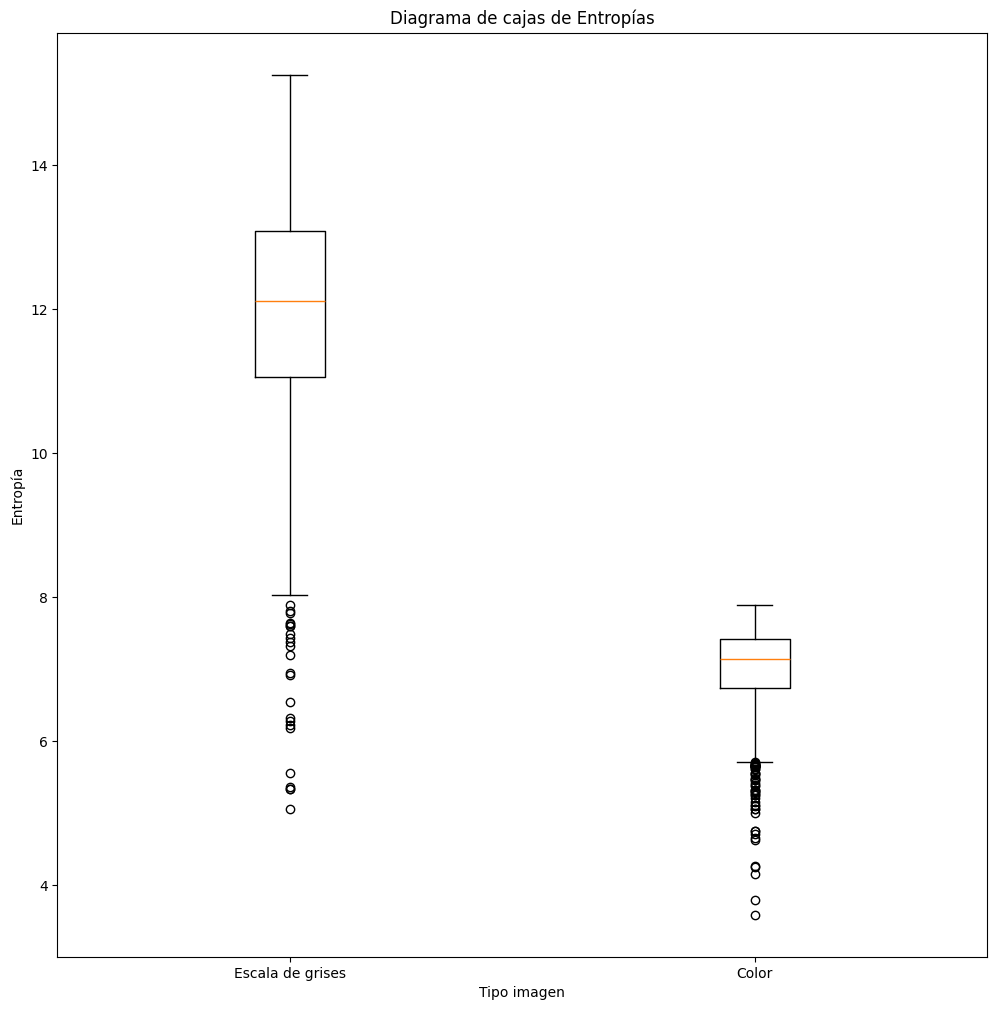

In [12]:
# creacion boxplot
plt.figure(figsize=(12, 12))  
plt.boxplot([lista_entropias_gris, lista_entropias_color], labels=['Escala de grises', 'Color'])
plt.xlabel('Tipo imagen')
plt.ylabel('Entropía')
plt.title('Diagrama de cajas de Entropías')

plt.show()

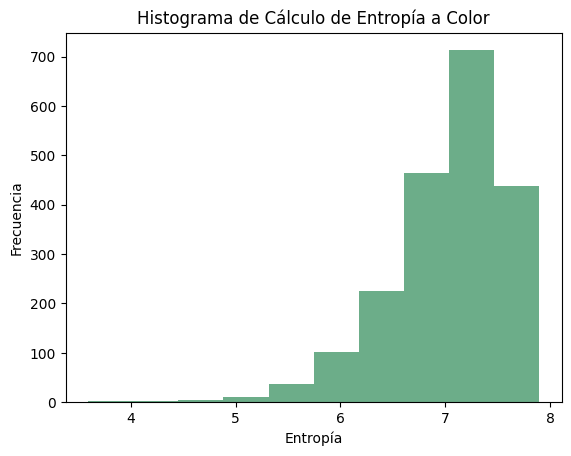

In [4]:
# histograma de tiempos de cálculo de entropía a color
plt.figure()
plt.hist(lista_entropias_color, bins=10, color='seagreen', alpha=0.7)
plt.xlabel('Entropía')
plt.ylabel('Frecuencia')
plt.title('Histograma de Cálculo de Entropía a Color')
plt.show()

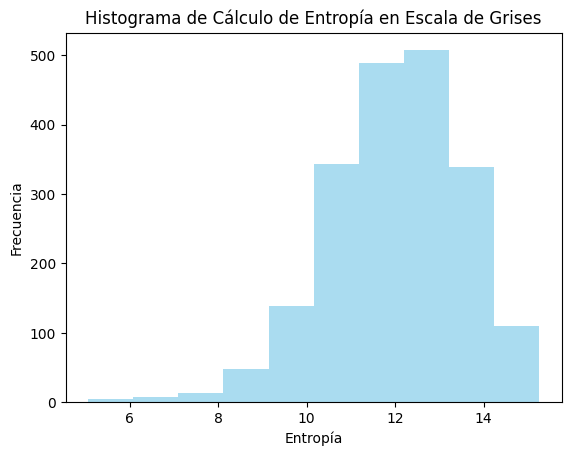

In [6]:
# histograma de tiempos de cálculo de entropía en escala de grises
plt.figure()
plt.hist(lista_entropias_gris, bins=10, color='skyblue', alpha=0.7)
plt.xlabel('Entropía')
plt.ylabel('Frecuencia')
plt.title('Histograma de Cálculo de Entropía en Escala de Grises')
plt.show()